In [289]:
import requests
import datetime
import pandas as pd

In [311]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import cryptocompy
from cryptocompy.cryptocompy import coin, price
from datetime import datetime as Date

In [298]:
# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [342]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df.index = [Date.fromtimestamp(d) for d in df.time]
    return df

def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

def priceCurrent(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [303]:
priceCurrent("ADA", comparison_symbols = ["BTC"], exchange='Binance')
priceCurrent("BTC", comparison_symbols = ["USD"], exchange='Bitstamp')
coin.get_coin_list(coins=["ADA", "ETH"])
coin_data = coin.get_coin_snapshot("ADA", "BTC")
coin_data

for exchData in coin_data["Exchanges"]:
    if exchData["MARKET"] in ["Poloniex", "Binance", "Coinbase", "BitTrex", "Kraken", "Bitstamp"]:
        print ("{:15} {:20} {:20}".format(exchData["MARKET"], 
                                               exchData["PRICE"], 
                                               exchData["VOLUME24HOUR"], 
                                               ))
        
price.get_current_price("BTC", ["USD"], e="Coinbase")
price.get_current_price("BTC", ["USD"], e="BitTrex")
price.get_current_price("BTC", ["USD"], e="Poloniex")

{'BTC': 3.456e-05}

{'USD': 14513.73}

{'ADA': {'Algorithm': 'Ouroboros',
  'CoinName': 'Cardano',
  'FullName': 'Cardano (ADA)',
  'FullyPremined': '0',
  'Id': '321992',
  'ImageUrl': '/media/12318177/ada.png',
  'Name': 'ADA',
  'PreMinedValue': 'N/A',
  'ProofType': 'PoS',
  'SortOrder': '1635',
  'Sponsored': False,
  'Symbol': 'ADA',
  'TotalCoinSupply': '45000000000',
  'TotalCoinsFreeFloat': 'N/A',
  'Url': '/coins/ada/overview'},
 'ETH': {'Algorithm': 'Ethash',
  'CoinName': 'Ethereum',
  'FullName': 'Ethereum (ETH)',
  'FullyPremined': '0',
  'Id': '7605',
  'ImageUrl': '/media/20646/eth_logo.png',
  'Name': 'ETH',
  'PreMinedValue': 'N/A',
  'ProofType': 'PoW',
  'SortOrder': '2',
  'Sponsored': False,
  'Symbol': 'ETH',
  'TotalCoinSupply': '0',
  'TotalCoinsFreeFloat': 'N/A',
  'Url': '/coins/eth/overview'}}

{'AggregatedData': {'FLAGS': '4',
  'FROMSYMBOL': 'ADA',
  'HIGH24HOUR': '0.00003519',
  'HIGHDAY': '0.00003468',
  'LASTMARKET': 'Binance',
  'LASTTRADEID': '1160519',
  'LASTUPDATE': '1514579516',
  'LASTVOLUME': '158',
  'LASTVOLUMETO': '0.00546048',
  'LOW24HOUR': '0.0000277',
  'LOWDAY': '0.00002774',
  'MARKET': 'CCCAGG',
  'OPEN24HOUR': '0.00002839',
  'OPENDAY': '0.00002831',
  'PRICE': '0.00003313',
  'TOSYMBOL': 'BTC',
  'TYPE': '5',
  'VOLUME24HOUR': '343351620.62218624',
  'VOLUME24HOURTO': '10672.196171590005',
  'VOLUMEDAY': '322644436.96995497',
  'VOLUMEDAYTO': '10087.081730149752'},
 'Algorithm': None,
 'BlockNumber': 0,
 'BlockReward': 0.0,
 'Exchanges': [{'FLAGS': '1',
   'FROMSYMBOL': 'ADA',
   'HIGH24HOUR': '0.0000363',
   'LASTTRADEID': '1160519',
   'LASTUPDATE': '1514579516',
   'LASTVOLUME': '158',
   'LASTVOLUMETO': '0.00546048',
   'LOW24HOUR': '0.00002802',
   'MARKET': 'Binance',
   'OPEN24HOUR': '0.00002862',
   'PRICE': '0.00003456',
   'TOSYMBOL': 'BTC',

In [343]:
hourly_price_historical("ADA", 'BTC', 9999, time_delta, "Binance")

,close,high,low,open,time,volumefrom,volumeto
2017-10-07 13:00:00,0.000000,0.000000,0.000000,0.000000,1507377600,0,0.00
2017-10-07 14:00:00,0.000000,0.000000,0.000000,0.000000,1507381200,0,0.00
2017-10-07 15:00:00,0.000000,0.000000,0.000000,0.000000,1507384800,0,0.00
2017-10-07 16:00:00,0.000000,0.000000,0.000000,0.000000,1507388400,0,0.00
2017-10-07 17:00:00,0.000000,0.000000,0.000000,0.000000,1507392000,0,0.00
2017-10-07 18:00:00,0.000000,0.000000,0.000000,0.000000,1507395600,0,0.00
2017-10-07 19:00:00,0.000000,0.000000,0.000000,0.000000,1507399200,0,0.00
2017-10-07 20:00:00,0.000000,0.000000,0.000000,0.000000,1507402800,0,0.00
2017-10-07 21:00:00,0.000000,0.000000,0.000000,0.000000,1507406400,0,0.00
2017-10-07 22:00:00,0.000000,0.000000,0.000000,0.000000,1507410000,0,0.00


In [95]:
time_delta = 1 # Bar width in hours
df = hourly_price_historical('ADA', 'BTC', 9999, time_delta, "Binance")
df.tail(10)
time_delta = 20 # Bar width in minutes
dfm = minute_price_historical('BTC', 'USD', 9999, time_delta, "Bitstamp")
time_delta = 1 # Bar width in hours
dfh = hourly_price_historical('BTC', 'USD', 9999, time_delta, "Bitstamp")
dfm.tail(10)
dfh = hourly_price_historical("GNO", 'BTC', 9999, time_delta, "Poloniex")
hourly_price_historical("ADA", 'BTC', 9999, time_delta, exchange)
[(x["MARKET"], x["PRICE"])  for x in coin.get_coin_snapshot("ADA", "BTC")["Exchanges"]]

In [142]:
# First transactions:
transactionsPoloniex = """Market	Type	Category	Price/Share	Amount	Fee	Total	Transaction Date
XMR/BTC	Buy	Exchange	0.02427900	0.30695223	0.00076738 XMR (0.25%)	0.00745249 BTC	2017-12-22 21:53:30
DASH/BTC	Buy	Exchange	0.08325155	0.08943199	0.00022358 DASH (0.25%)	0.00744535 BTC	2017-12-22 21:51:17
GNO/BTC	Buy	Exchange	0.01141164	0.65359755	0.00163399 GNO (0.25%)	0.00745861 BTC	2017-12-22 21:47:10
ZEC/BTC	Buy	Exchange	0.03829500	0.19581595	0.00048954 ZEC (0.25%)	0.00749877 BTC	2017-12-22 21:45:14
OMG/BTC	Buy	Exchange	0.00109400	1.77831987	0.00266748 OMG (0.15%)	0.00194548 BTC	2017-12-21 03:21:21
SC/BTC	Buy	Exchange	0.00000132	1473.86616541	2.21079925 SC (0.15%)	0.00194550 BTC	2017-12-21 03:20:23
STR/BTC	Buy	Exchange	0.00001628	120.26024539	0.18039037 STR (0.15%)	0.00195783 BTC	2017-12-21 03:17:21
"""

transactions = []
transactionsPoloniex = transactionsPoloniex.splitlines()
headers = transactionsPoloniex[0]
columns = headers.split("\t")
for txn in transactionsPoloniex[1:]:
    transaction = txn.split("\t")
    transactionDict = {}
    for i in range(len(columns)):
        transactionDict[columns[i]] = transaction[i]
    transactions.append(transactionDict)

In [259]:
def filter_transactions(transactions, by_date = None):
    if by_date == None:
        return transactions
    else:
        return transactions

def sort_transactions(transactions, asc = False):
    return transactions

def process_transactions(transactions):
    
    exchanges = {}
    coins = {}
    cash = {}

    for txn in transactions:
        if txn.exchange not in exchanges.keys():
            exchanges[txn.exchange] = {}
            exchanges[txn.exchange]["Coins"] = {}
            exchanges[txn.exchange]["Cash"] = {}
            
        asset = txn.asset
        amount = txn.amount
        direction = txn.direction
        
        if isinstance(asset, Cash):
            if asset.name not in exchanges[txn.exchange]["Cash"].keys():
                exchanges[txn.exchange]["Cash"][asset.name] = 0.0

            if direction == "BUY":
                exchanges[txn.exchange]["Cash"][asset.name] += amount
            else:
                exchanges[txn.exchange]["Cash"][asset.name] -= amount

        if isinstance(asset, Coin):
            if asset.name not in exchanges[txn.exchange]["Coins"].keys():
                exchanges[txn.exchange]["Coins"][asset.name] = 0.0

            if direction == "BUY":
                exchanges[txn.exchange]["Coins"][asset.name] += amount
            else:
                exchanges[txn.exchange]["Coins"][asset.name] -= amount

    return exchanges

        
class Coin:
    def __init__(self, name):
        self.name = name
        
class Cash:
    def __init__(self, name):
        self.name = name
        
    
class Book:
    def __init__(self, name):
        self.name = name
        self.transactions = []
        
    def buy(self, amount, asset, datetime, exchange):
        self.transactions.append(Transaction("BUY", amount, asset, exchange))
        
    def sell(self, amount, asset, datetime, exchange):
        self.transactions.append(Transaction("SELL", amount, asset, exchange))
        
    def positions(self, as_of_date = None, include_cash = False):
        transactions = list(self.transactions)
        transactions = sort_transactions(transactions)
        transactions = filter_transactions(transactions)
        exchanges_holdings  = process_transactions(transactions)
        
        positions = []
        for exch, holdings in exchanges_holdings.items():
            for coin, amount in holdings["Coins"].items():
                positions.append({"Coin" : coin, "Amount": amount, "Exchange": exch})
        
        return pd.DataFrame(positions, 
                            columns = ["Amount", "Exchange"], 
                            index=[pos["Coin"] for pos in positions])
            
class Transaction:
    def __init__(self, direction, amount, asset, exchange):
        self.direction = direction
        self.asset = asset
        self.amount = amount
        self.exchange = exchange


In [388]:
book = Book("Holding book")

book.buy(0.01586039, Coin("BTC"), Date(2017, 10, 18, 20, 10, 55), "Bitstamp")
book.buy(82.34, Coin("XRP"), Date(2017, 10, 18, 20, 10, 55), "Bitstamp")
book.buy(0.65359775, Coin("GNO"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.15679700, Coin("ETH"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.30695223, Coin("XMR"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.19581595, Coin("ZEC"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.0843199, Coin("DASH"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(158.84, Coin("REQ"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(13.99, Coin("IOT"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(1471.66, Coin("SC"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(63.94, Coin("ADA"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(0.56943, Cash("QTUM"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(1.78, Cash("OMG"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(2, Cash("EOS"), Date(2017, 10, 18, 20, 10, 55), "Binance")

portfolio = book.positions()

In [389]:
for row in portfolio.iterrows():
    (idx, content) = row
    print (idx, content["Amount"], content["Exchange"])

XMR 0.30695223 Poloniex
GNO 0.65359775 Poloniex
ETH 0.156797 Poloniex
ZEC 0.19581595 Poloniex
DASH 0.0843199 Poloniex
SC 1471.66 Poloniex
REQ 158.84 Binance
ADA 63.94 Binance
IOT 13.99 Binance
XRP 82.34 Bitstamp
BTC 0.01586039 Bitstamp


In [390]:
dataVsBtc = {}
dataVsUsd = {}

timedelta = 6
for (coinName, position) in portfolio.iterrows():
    amount = position["Amount"]
    exchange = position["Exchange"]
    print (coinName, amount, exchange)
    if coinName != "BTC":
        dataVsBtc[coinName] = hourly_price_historical(coinName, 'BTC', 9999, timedelta, exchange)
    else:
        dataVsUsd[coinName] = hourly_price_historical(coinName, 'USD', 9999, timedelta, exchange)

XMR 0.30695223 Poloniex
GNO 0.65359775 Poloniex
ETH 0.156797 Poloniex
ZEC 0.19581595 Poloniex
DASH 0.0843199 Poloniex
SC 1471.66 Poloniex
REQ 158.84 Binance
ADA 63.94 Binance
IOT 13.99 Binance
XRP 82.34 Bitstamp
BTC 0.01586039 Bitstamp


In [419]:
btc = dataVsUsd["BTC"]

pricesInBtc = {}
pricesInUsd = {}
timestamps = []

startDate = Date(2017, 12, 21)
for timestamp, btcValues in btc.iterrows():
    #print (timestamp, btcValues)
    
    if timestamp < startDate:
        continue
        
    for (coinName, position) in portfolio.iterrows():
        if coinName not in pricesInBtc.keys():
            pricesInBtc[coinName] = []
        if coinName not in pricesInUsd.keys():
            pricesInUsd[coinName] = []
        if coinName == "BTC":
            pricesInBtc[coinName].append(position["Amount"])
            pricesInUsd[coinName].append(btcValues["close"] * position["Amount"])
            
        else:
            
            thisCoinDataVsBtc = dataVsBtc[coinName]
            thisCoinRowAtDatetime = thisCoinDataVsBtc[thisCoinDataVsBtc.index == timestamp]
            thisCoinCloseAtDatetime = thisCoinRowAtDatetime["close"]
            
            pricesInBtc[coinName].append(thisCoinCloseAtDatetime.values[0] * position["Amount"])
            pricesInUsd[coinName].append(thisCoinCloseAtDatetime.values[0] * 
                                         btcValues["close"] * 
                                         position["Amount"])
            
            #print (coinName, btcValues["close"], btcValues["close"], position["Amount"])
        
    timestamps.append(timestamp)


In [420]:
colours = {"XMR": "#B7CC66", 
          "GNO": "#5B2971",
          "ETH" : "#D46A6A", 
          "ZEC": "#55DBCB", 
          "DASH": "#453823",
          "SC" : "#FFAC81", 
          "REQ": "#023C40", 
          "ADA": "#80A1C1",
          "IOT" : "#2BD9FE", 
          "XRP": "#D1F5FF", 
          "BTC": "#DB162F",
         }

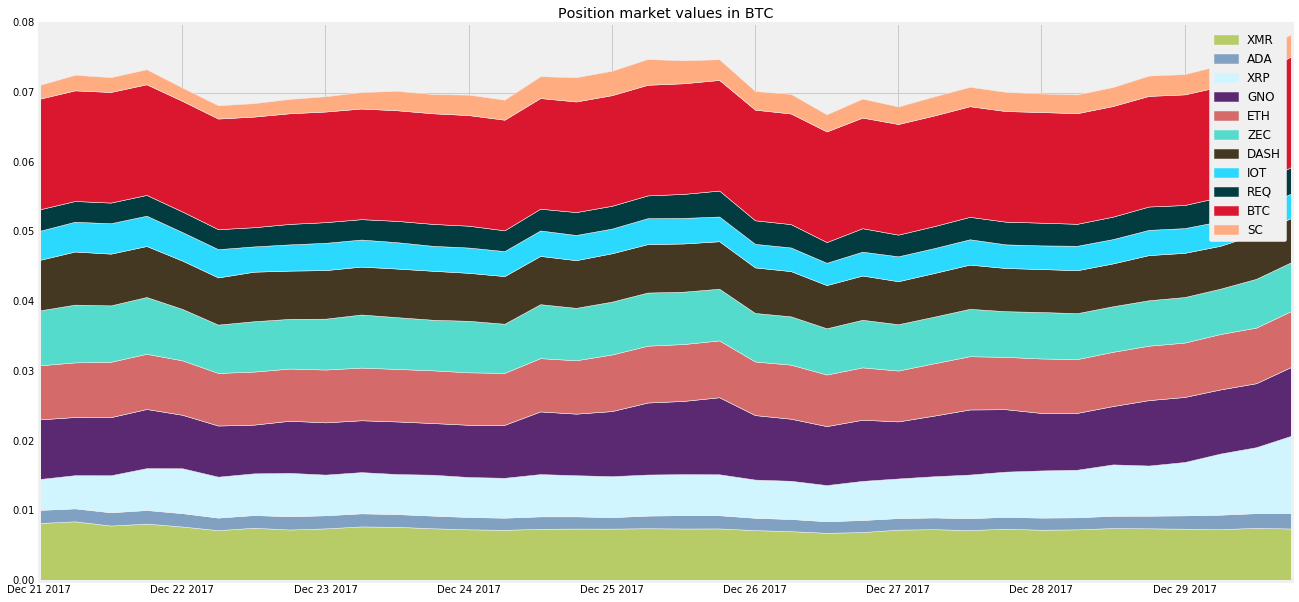

In [432]:
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInBtc.items()],
              colors = [v for k,v in colours.items()])

plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys())
plt.title("Position market values in BTC")

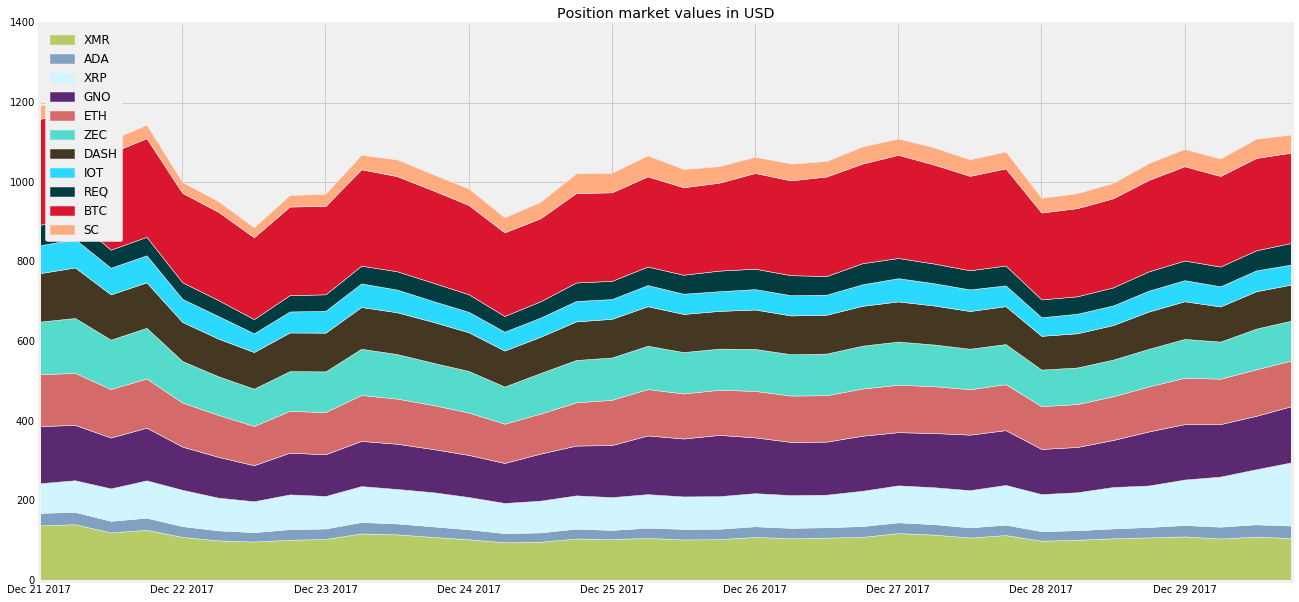

In [431]:
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInUsd.items()],
              colors = [v for k,v in colours.items()])

plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys(),
           loc = 'upper left')

plt.title("Position market values in USD")

(0, 100)

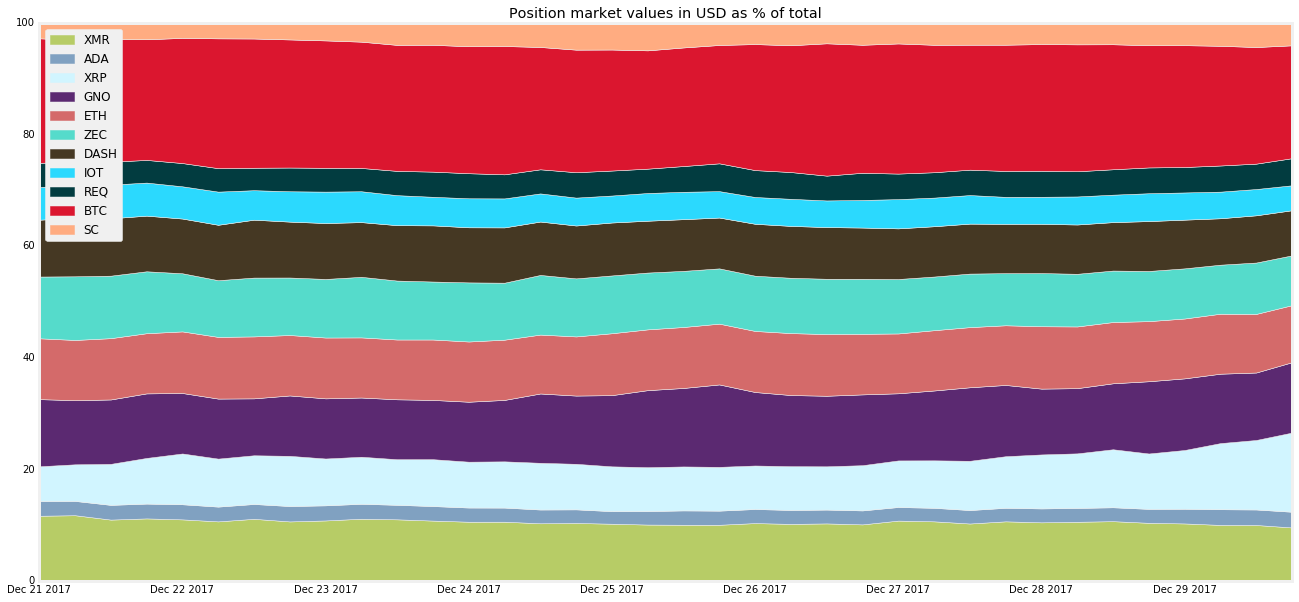

In [433]:
pricesInUsdStacked = {}

for coinName, coinPrices in pricesInUsd.items():
    pricesInUsdStacked[coinName] = []
    
    for i in range(len(coinPrices)):
        thisDayTotal = 0
        for coinKey in pricesInUsd.keys():
            thisDayTotal += pricesInUsd[coinKey][i]
            
        pricesInUsdStacked[coinName].append(pricesInUsd[coinName][i] / thisDayTotal * 100)
    
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInUsdStacked.items()],
              colors = [v for k,v in colours.items()])
plt.ylim(0, 100)
plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys(),
           loc = 'upper left')

plt.title("Position market values in USD as % of total")

(0, 100)

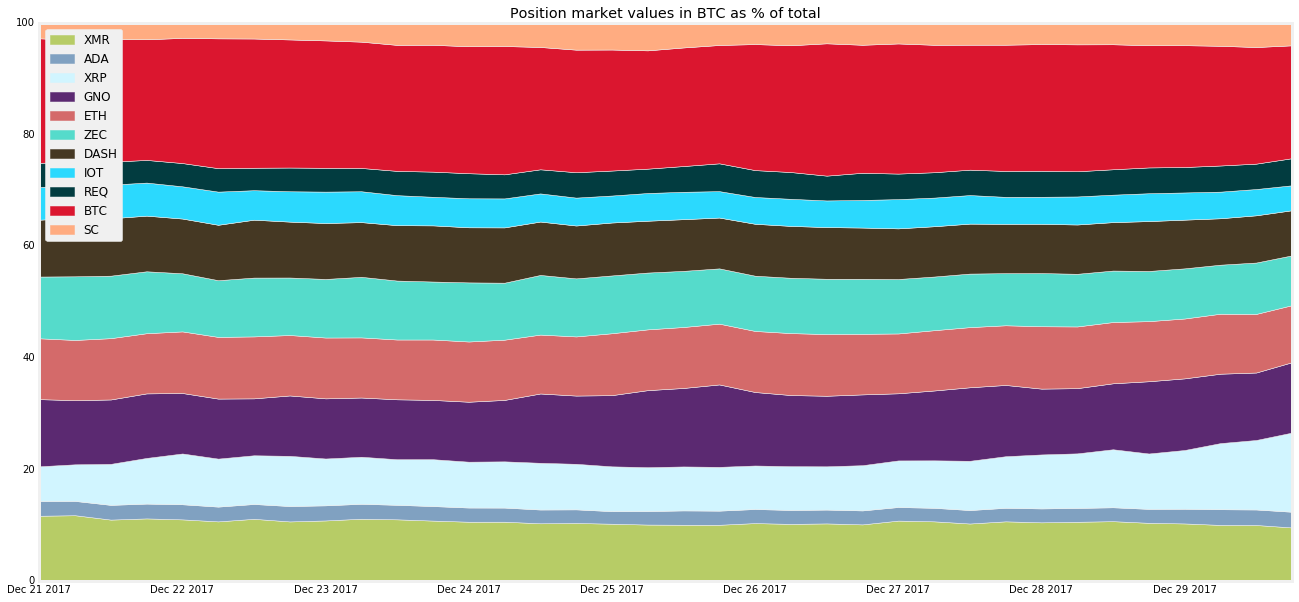

In [434]:
pricesInBtcStacked = {}

for coinName, coinPrices in pricesInBtc.items():
    pricesInBtcStacked[coinName] = []
    
    for i in range(len(coinPrices)):
        thisDayTotal = 0
        for coinKey in pricesInBtc.keys():
            thisDayTotal += pricesInBtc[coinKey][i]
            
        pricesInBtcStacked[coinName].append(pricesInBtc[coinName][i] / thisDayTotal * 100)
    
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInBtcStacked.items()],
              colors = [v for k,v in colours.items()])
plt.ylim(0, 100)
plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys(),
           loc = 'upper left')

plt.title("Position market values in BTC as % of total")